In [1]:
from sklearn.datasets import load_boston
import pandas as pd
    

In [2]:
boston = load_boston()
X = boston.data
y = boston.target

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
u = np.mean(X, axis = 0)
std = np.std(X , axis = 0)
print(u.shape)
print(std.shape)
X = (X-u) / std 
pd.DataFrame (X).head()
plt.scatter(X[:,5],y)
plt.show()



(13,)
(13,)


<Figure size 800x550 with 1 Axes>

In [8]:
X.shape, y.shape
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(506, 14)


In [9]:
def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range (n):
        y_ += (theta[i]* x[i])
    return y_

def error(X,y,theta):
    error = 0.0
    m = X.shape[0]
    for i in range (m):
        y_ = hypothesis(X[i],theta)
        error += (y_ - y[i])**2
    return error/m
        

def gradient(X,y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    for j in range(n):
        for i in range(m):
                y_= hypothesis(X[i], theta)
                grad[j] += (y_ - y[i])*X[i][j]
    return grad/m  
        
def gradient_descent(X,y,learning_rate= 0.1,max = 300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range (max):
        e =  error(X,y,theta)
        error_list.append(e)
        grad = gradient(X,y,theta)
        for j in range (n):
            theta[j] = theta[j] - learning_rate*grad[j]
            
    return error_list,theta


In [10]:
error_list,theta = gradient_descent(X,y)
print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


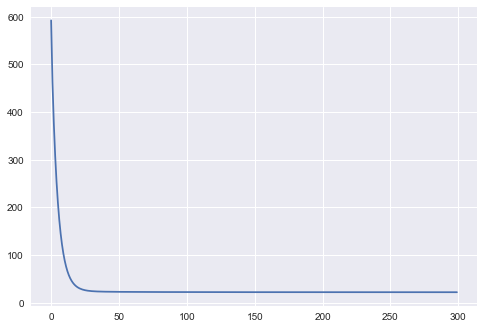

In [13]:
plt.style.use('seaborn')
plt.plot(error_list)
plt.show()